# Statistics & Visualization in Python
## Does smoking affect your lung capacity?

It is well known that smoking is not good for your health, but how can we quantify this in
a statistical way? In this assignment you will work with a dataset consisting of information
on the lung function, smoking status and demographics of 654 youth and children aged 3-19.
See the Appendix A below for a detiled description of the data material, and see in particular
Appendix B below for a description of the so-called FEV1 measure, which quantifies lung
function

### Exercise 1
a)	Read the data from the file smoking.txt, and divide the dataset into two groups consisting of smokers and non-smokers. 

In [4]:
#Import libaries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
from scipy.stats import t

#Import the dataset
data = np.loadtxt('smoking.txt')

In [7]:
# divide the dataset into two groups consisting of smokers and non-smokers
smoker = data[data[:,4] == 1] # select rows where fifith column = 0
nonsmoker = data[data[:,4] == 0] # select rows where fifith column = 1

b)	Report your computed average FEV1 scores. Are you surprised?

In [11]:
#Computing the average lungfunction, measured in FEV1, among the smokers and among the non-smokers
smoker_mean = np.mean(smoker[:,1])
non_smoker_mean = np.mean(nonsmoker[:,1])
print('Mean of FEV1-Smoker:', smoker_mean)
print('Mean of FEV1-NonSmoker:', non_smoker_mean)
print('\t')
print('Yes, I was surprised to see this as I did not expect that the average lung function of the smokers is higher than the average lung function of non-smokers.')

Mean of FEV1-Smoker: 3.2768615384615383
Mean of FEV1-NonSmoker: 2.5661426146010187
	
Yes, I was surprised to see this as I did not expect that the average lung function of the smokers is higher than the average lung function of non-smokers.


## Exercise 2 (Boxplot)
a) Make a box plot of the FEV1 in the two groups. What do you see?
Are you surprised?

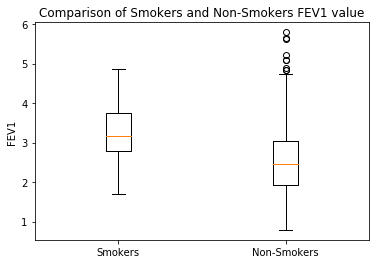

In [12]:
#Make a box plot of the FEV1 in the two groups.
FEV1data = (smoker[:,1]), (nonsmoker[:,1])
labels = ['Smokers', 'Non-Smokers']
plt.boxplot(FEV1data, labels=labels)
plt.ylabel('FEV1')
plt.title('Comparison of Smokers and Non-Smokers FEV1 value')
plt.show()

The boxplot shows that the non-smoker group has outliers, whereas the smoker group does not have outliers. The outliers, which are values that are far away of other data values, are located on the top and therefore show that some FEV1 values are considerably greater in the non-smoker group. When we look at the non-smoker boxplot, we can also observe that the quartile group 4 is relatively long. This suggests that the FEV1 values above the upper quartile are very diverse. Considered as a whole, the boxplots show that the FEV1 values of the non-smoker group are much more diverse than the FEV1 values of the smoker group. It is surprising to see that the FEV1 values of the non-smoker group vary much more than the once of the smoker group. This should lead to more investigation and a further analysis of the two different groups.

## Exercise 3 (Hypothesis Testing)
Next we will perform a hypothesis test to investigate the difference between the FEV1 level in the two populations smokers and non-smokers.

a)	Based on the supplied template hyptest.py, write a script that performs a two-sided t-test whose null hypothesis is that the two populations have the same mean. Use a significance level of α = 0.05, and return a binary response indicating acceptance or rejection of the null hypothesis.


In [13]:

print('H0 = Mean of smokers and non-smokers FEV1 level is the same')
print('H1 = Mean of smokers and non-smokers FEV1 level is not the same')
print('\n')
N1 = len(smoker) #Assign N1 to the Number of Smokers
N2 = len(nonsmoker) #Assign N2 to the Number of Non-Smokers
print('Number of Smokers:', len(smoker))
print('Number of Non-Smokers:', len(nonsmoker))
df = (N1 + N2 - 2) #calculating the degree of freedom
print ('Degree of Freedom:', df)
t_ctlval = t.ppf(0.95, df) #as the significance level is 0.05, the sigma is 0.95
print('Critical t-value:', t_ctlval)
t_value, p_value = stats.ttest_ind(smoker[:,1], nonsmoker[:,1])
print('Calculated t-statistic', t_value)
print('p-Value', p_value)
if t_value > t_ctlval: h = 'Reject H0, there is a significant difference in two sample means'
else: h = 'Reject H1, there is no significant difference in two sample means'
print('\n')
print('Conclusion: ',h)
print('\n')
#If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations



print('EXTRA CALCULATIONS/ RESULTS:')
std1 = smoker[:,1].std()
std2 = nonsmoker[:,1].std()
print('Smokers FEV1 standard deviation:', std1)
print('NonSmokers FEV1 standard deviation:',std2)
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df)
print('Average standard deviation between Smokers and Non-Smokers FEV1 data:', std_N1N2)
diff_mean = smoker[:,1].mean() - nonsmoker[:,1].mean()
print('Difference of Smokers FEV1 Mean and NonSmokers FEV1 Mean:', diff_mean)
MoE = t.ppf(0.95, df) * std_N1N2 * sqrt(1/N1 + 1/N2)
print('Margin of Error:', MoE)
print('\n')

H0 = Mean of smokers and non-smokers FEV1 level is the same
H1 = Mean of smokers and non-smokers FEV1 level is not the same


Number of Smokers: 65
Number of Non-Smokers: 589
Degree of Freedom: 652
Critical t-value: 1.6471940405817662
Calculated t-statistic 6.46445317259654
p-Value 1.9928459182932803e-10


Conclusion:  Reject H0, there is a significant difference in two sample means


EXTRA CALCULATIONS/ RESULTS:
Smokers FEV1 standard deviation: 0.7441948230635282
NonSmokers FEV1 standard deviation: 0.8497992053058739
Average standard deviation between Smokers and Non-Smokers FEV1 data: 0.8400209692370695
Difference of Smokers FEV1 Mean and NonSmokers FEV1 Mean: 0.7107189238605196
Margin of Error: 0.18084622104796208




This two-sided t-test investigates on the difference between the FEV1 level in the two 
populations. We choose a significance level of 5% (0.05). The calculation shows that the 
absolute value of the t-statistic is greater than the critical t-value and thus, I can reject the null 
hypothesis. Given the stated hypothesis, the significance level is the value up until a p-value 
is considered as statistically significant. The p-value is below 0.05 and thus, the result is 
statistically significant for us. The p-value is almost 0 and hence, it is highly unlikely that that the obtained values would be observed under the null hypothesis (Mean of smokers and non-smokers FEV1 level is the same). Given this test, the observation of the data 
is highly unlikely with a true null hypothesis.

The results of the t-test indicate that the difference between the smokers FEV1 mean and the 
non-smokers FEV1 mean most likely reflect a true/real difference in the 
population that got sampled for this test. It is surprising to see that the calculated means are 
statically significant as I would have expected to observe that the smokers’ average FEV1 is 
lower than the one of the non-smoker population. However, the means display the real 
situation in our sample and further analysis is needed to understand why 
the smokers’ average FEV1 value is higher than the nonsmokers’ average FEV1 value.


## Exercise 4 (Correlation)
Make a 2D plot of age versus FEV1. What do you see? Compute the correlation between age and FEV1. 

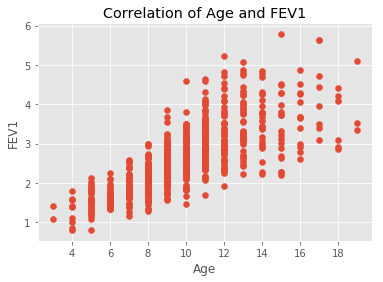

[[1.         0.75645899]
 [0.75645899 1.        ]]
The correlation of age and FEV1 of the whole population is 0.75645899, a positive correlation.


In [15]:
plt.style.use('ggplot')
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.title('Correlation of Age and FEV1')
plt.show()

#Compute the correlation of age versus  FEV1, not of Smoker and Non-Smokers but all people in the dataset
Correlation_age_FEV1 = np.corrcoef(data[:,0], data[:,1])
print(Correlation_age_FEV1)
print('The correlation of age and FEV1 of the whole population is 0.75645899, a positive correlation.')

The 2D plot as well as the correlation value show that the FEV1 and Age are positively correlated. This makes sense because young people are still growing and as they become older their lung capacity is growing with a growing and developing lung. However, it also unveils that the FEV1 values get more diverse, the older the person is. It suggests that the older a person is, the more important other values/factors become in regard to the lung capacity FEV1. 

## Exercise 5 (Histograms)
Create a histogram over the age of subjects in each of the two groups smokers and non-smokers. What do you see? Does this explain your results on lung function in the two groups? 

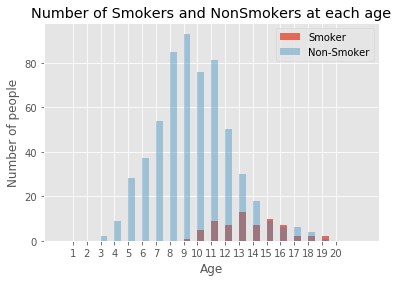

In [17]:
Age_smoker = smoker[:,0]
Age_nonsmoker = nonsmoker[:,0]
bins = np.linspace(0, 22, 45)
plt.hist(Age_smoker, bins, alpha=0.8, label='Smoker')
plt.hist(Age_nonsmoker, bins, alpha=0.4, label='Non-Smoker')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.ylabel('Number of people')
plt.title('Number of Smokers and NonSmokers at each age')
plt.show()

The comparison of the histograms that show the age distribution of the two populations illustrate key differences. First, the non-smoker group contain less diverse age levels. Whereas the non-smokers are between 9 and 19 years old, the smokers are between 3 and 19 years old. As we have just analyzed, the age correlates with the lung capacity. When the average age of the smoker populations is considerably higher than the average age of the non-smoker population, it makes sense to observe higher lung capacity levels in the smoker population. This can explain the results of the difference in the average lung function levels. 